In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns 

df = pd.read_csv('C:/Users/nejat/AIM Projects/data/benin-malanville.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [2]:
#Summary Statistics
summary_stats = df.describe()
summary_stats


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [3]:
# Check for missing values in GHI, DNI, and DHI
missing_values = df[['GHI', 'DNI', 'DHI']].isnull().sum()
print("Missing values in GHI, DNI, and DHI:\n", missing_values)

Missing values in GHI, DNI, and DHI:
 GHI    0
DNI    0
DHI    0
dtype: int64


In [4]:
# Check for negative values in GHI, DNI, DHI
print("Negative values in GHI, DNI, DHI:")
print(df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)])
df = df[(df['GHI'] >= 0) & (df['DNI'] >= 0) & (df['DHI'] >= 0)]

Negative values in GHI, DNI, DHI:
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

     

In [5]:
# Check for outliers in GHI, DNI, DHI, ModA, ModB, WS, WSgust
z_scores_1 = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI']]))
outliers_1 = df[(z_scores_1 > 3).any(axis=1)]

z_scores_2 = np.abs(stats.zscore(df[['ModA', 'ModB', 'WS', 'WSgust']]))
outliers_2 = df[(z_scores_2 > 3).any(axis=1)]

print("\nPotential outliers in GHI, DNI, and DHI:\n", outliers_1)
print("\nPotential outliers in ModA, ModB, WS, or WSgust:\n", outliers_2)


Potential outliers in GHI, DNI, and DHI:
                Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
778     2021-08-09 12:59  1088.0  379.7  688.9  1016.0  1023.0  31.7  63.1   
779     2021-08-09 13:00  1012.0  298.4  694.3   945.0   951.0  31.4  64.6   
780     2021-08-09 13:01  1028.0  308.2  700.2   967.0   973.0  31.2  64.6   
781     2021-08-09 13:02   930.0  210.0  702.6   869.0   874.0  31.0  65.8   
782     2021-08-09 13:03   935.0  217.5  700.4   878.0   882.0  30.9  66.7   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
494665  2022-07-18 12:26   970.0  216.4  745.8   906.0   903.0  28.1  80.8   
494669  2022-07-18 12:30  1010.0  287.4  711.8   920.0   917.0  28.4  78.7   
494676  2022-07-18 12:37   818.0  122.7  686.2   769.5   767.7  28.2  78.9   
510510  2022-07-29 12:31  1019.0  296.9  712.3   934.0   932.0  28.3  78.0   
510511  2022-07-29 12:32   932.0  205.6  716.1   850.0   848.0  28.3  79.0   

         WS  WSgust 

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

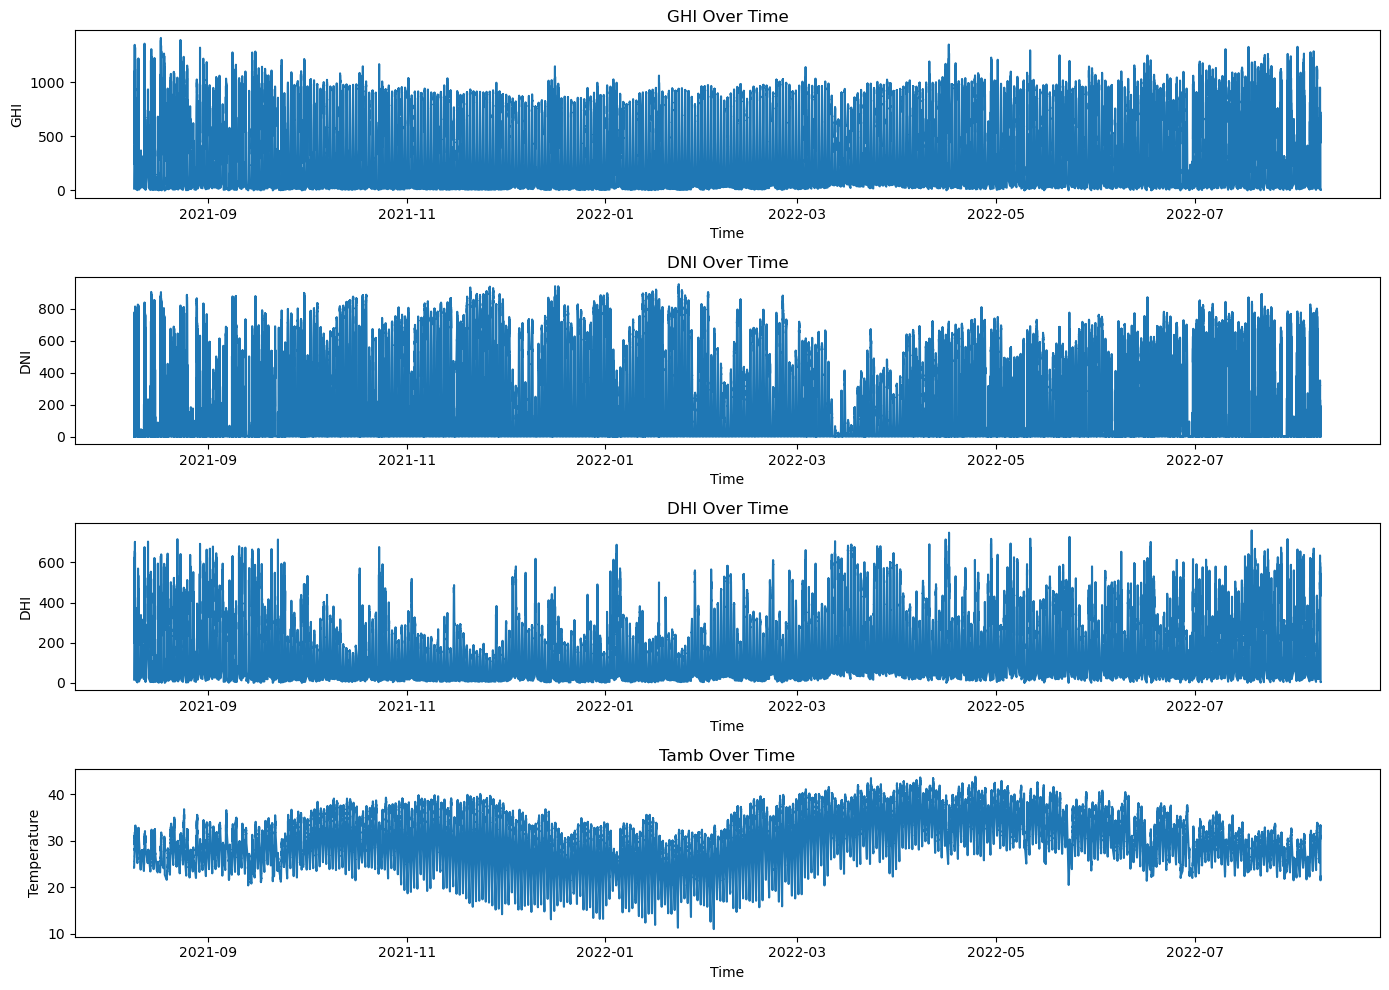

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.set_index('Timestamp', inplace=True)
df_clean = df[['GHI', 'DNI', 'DHI', 'Tamb']].dropna()

plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
sns.lineplot(data=df, x=df.index, y='GHI')
plt.title('GHI Over Time')
plt.xlabel('Time')
plt.ylabel('GHI')

plt.subplot(4, 1, 2)
sns.lineplot(data=df, x=df.index, y='DNI')
plt.title('DNI Over Time')
plt.xlabel('Time')
plt.ylabel('DNI')

plt.subplot(4, 1, 3)
sns.lineplot(data=df, x=df.index, y='DHI')
plt.title('DHI Over Time')
plt.xlabel('Time')
plt.ylabel('DHI')

plt.subplot(4, 1, 4)
sns.lineplot(data=df, x=df.index, y='Tamb')
plt.title('Tamb Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.tight_layout()
plt.show()

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

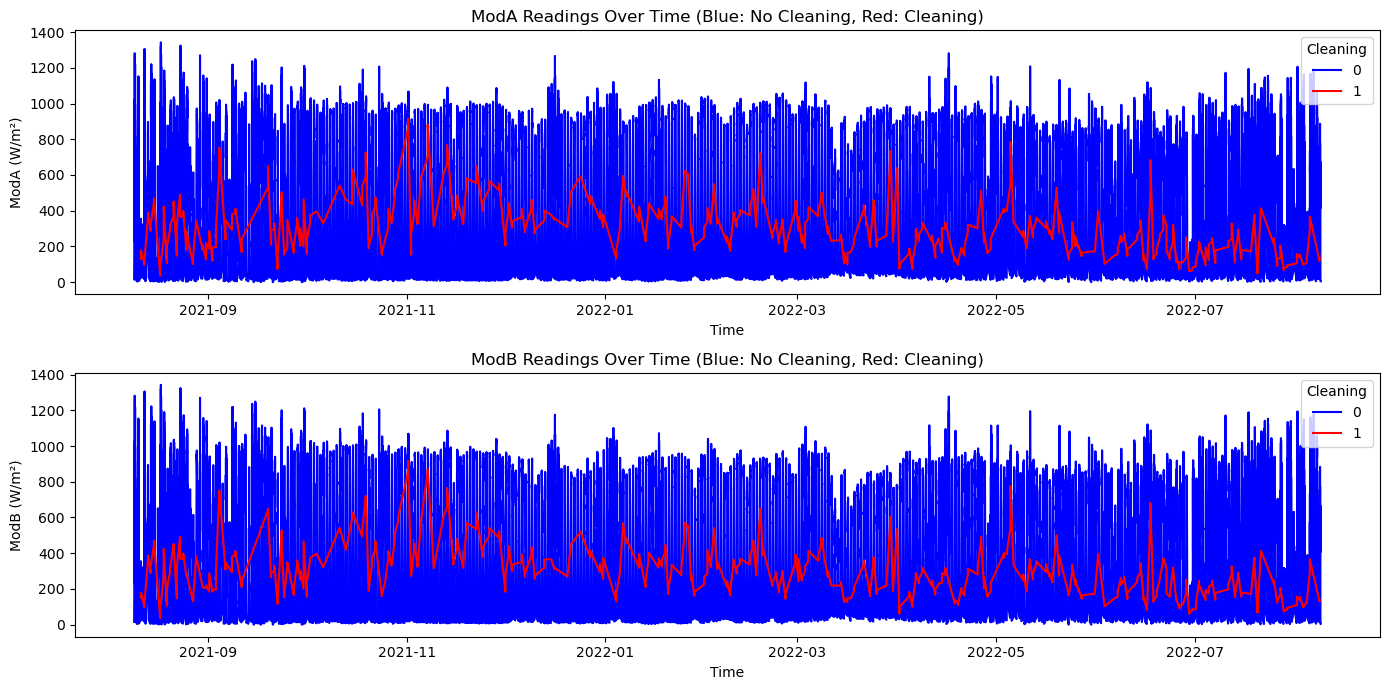

In [7]:
# Plot sensor readings ModA and ModB over time based on Cleaning status
plt.figure(figsize=(14, 7))

# ModA plot
plt.subplot(2, 1, 1)
sns.lineplot(data=df, x=df.index, y='ModA', hue='Cleaning', palette={0: 'blue', 1: 'red'})
plt.title('ModA Readings Over Time (Blue: No Cleaning, Red: Cleaning)')
plt.xlabel('Time')
plt.ylabel('ModA (W/m²)')

# ModB plot
plt.subplot(2, 1, 2)
sns.lineplot(data=df, x=df.index, y='ModB', hue='Cleaning', palette={0: 'blue', 1: 'red'})
plt.title('ModB Readings Over Time (Blue: No Cleaning, Red: Cleaning)')
plt.xlabel('Time')
plt.ylabel('ModB (W/m²)')

plt.tight_layout()
plt.show()


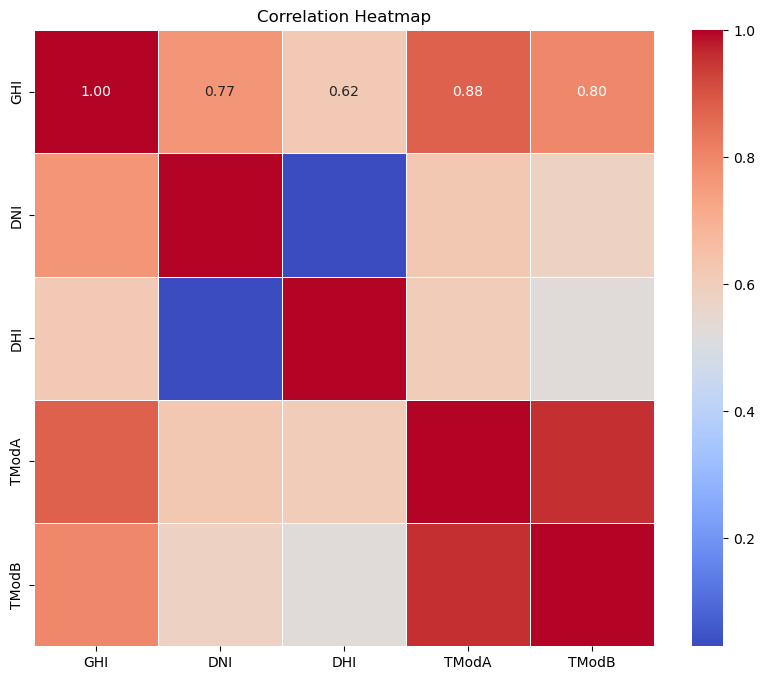

In [8]:
# Correlation matrix for solar radiation components and temperature measures
correlation_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = df[correlation_columns].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


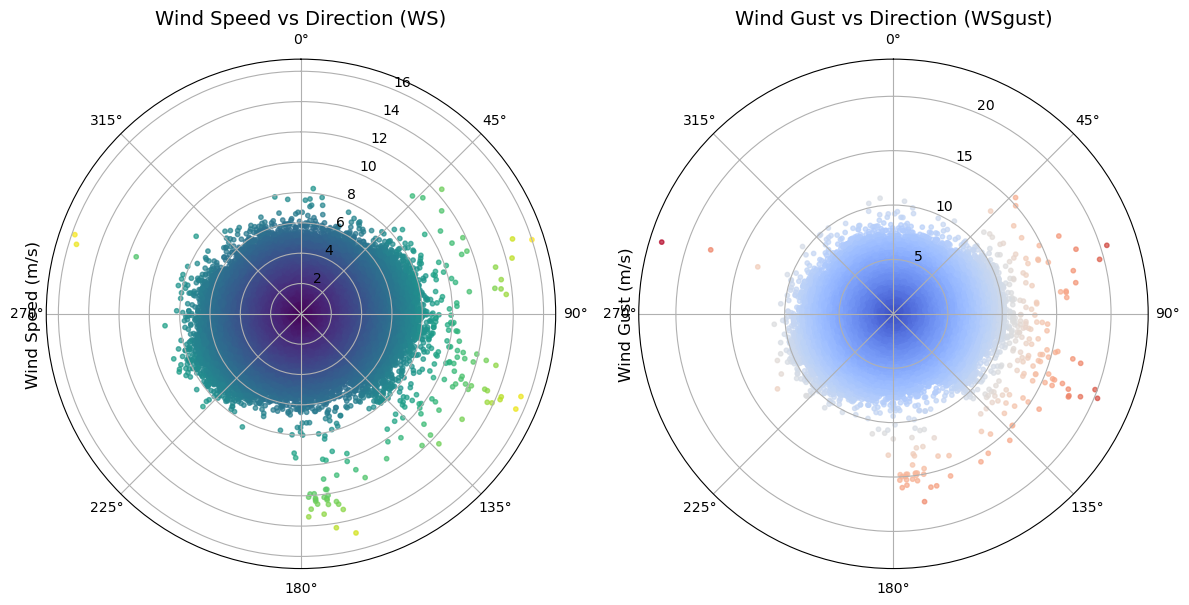

In [9]:
wind_data = df[['WS', 'WSgust', 'WD']].dropna()

wind_data['WD_radians'] = np.radians(wind_data['WD'])

plt.figure(figsize=(12, 6))
# Subplot 1: Wind Speed (WS) against Wind Direction (WD)
ax1 = plt.subplot(1, 2, 1, projection='polar')
ax1.scatter(wind_data['WD_radians'], wind_data['WS'], alpha=0.7, s=10, c=wind_data['WS'], cmap='viridis')
ax1.set_theta_direction(-1)  # Set the direction of theta
ax1.set_theta_offset(np.pi / 2.0)  # Set the offset for proper orientation (North = 0 degrees)
ax1.set_title('Wind Speed vs Direction (WS)', fontsize=14)
ax1.set_ylabel('Wind Speed (m/s)', fontsize=12)

# Subplot 2: Wind Gust Speed (WSgust) against Wind Direction (WD)
ax2 = plt.subplot(1, 2, 2, projection='polar')
ax2.scatter(wind_data['WD_radians'], wind_data['WSgust'], alpha=0.7, s=10, c=wind_data['WSgust'], cmap='coolwarm')
ax2.set_theta_direction(-1)
ax2.set_theta_offset(np.pi / 2.0)
ax2.set_title('Wind Gust vs Direction (WSgust)', fontsize=14)
ax2.set_ylabel('Wind Gust (m/s)', fontsize=12)

plt.tight_layout()
plt.show()

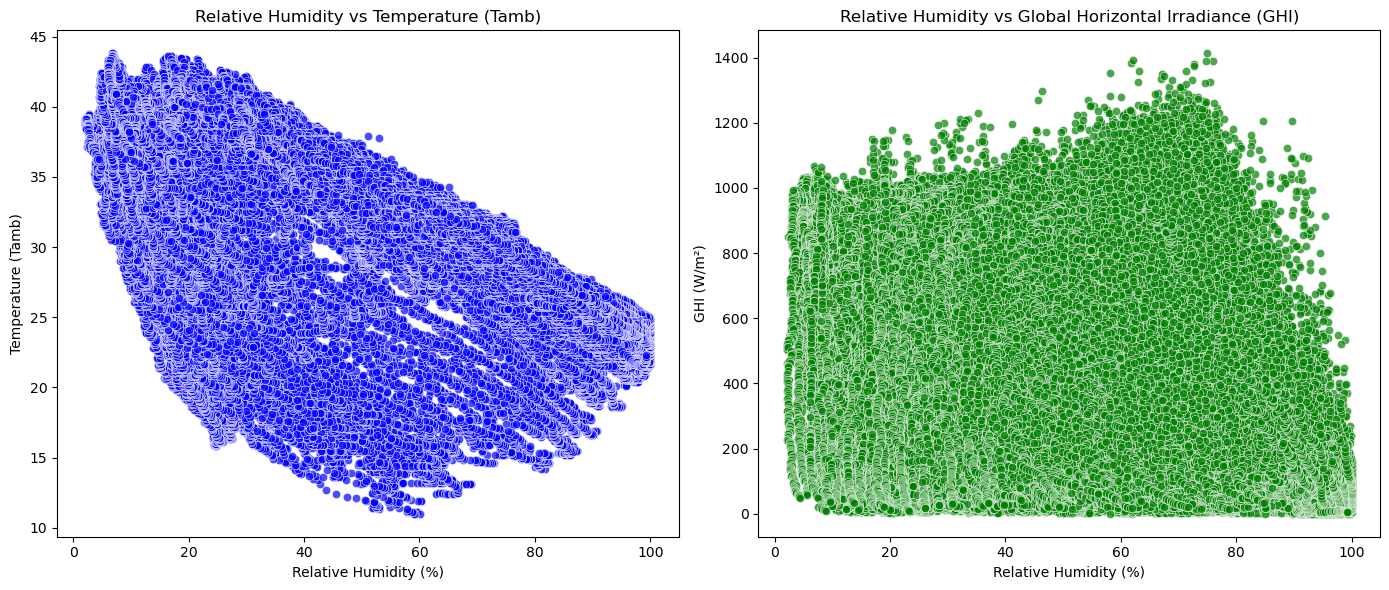

In [10]:
temp_data = df[['RH', 'Tamb', 'GHI']].dropna()

# Scatter plot: RH vs Temperature
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=temp_data, x='RH', y='Tamb', alpha=0.7, color='blue')
plt.title('Relative Humidity vs Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (Tamb)')

# Scatter plot: RH vs Solar Radiation (GHI)
plt.subplot(1, 2, 2)
sns.scatterplot(data=temp_data, x='RH', y='GHI', alpha=0.7, color='green')
plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')

plt.tight_layout()
plt.show()

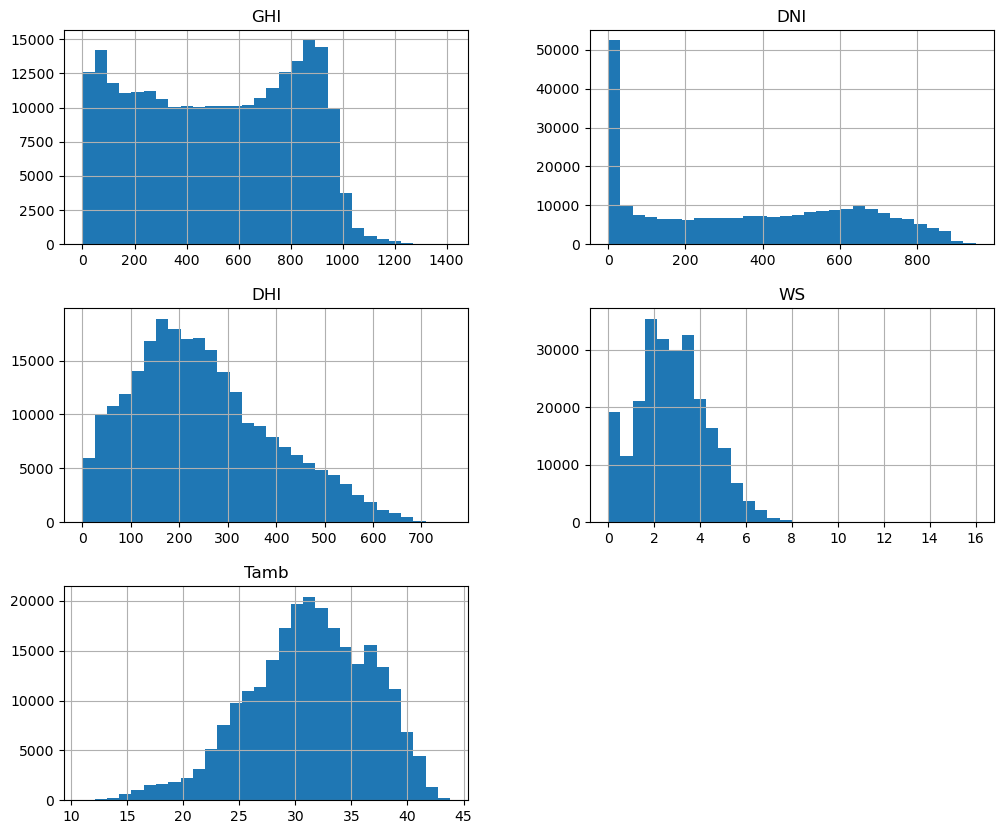

In [11]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
df[variables].hist(bins=30, figsize=(12, 10))
plt.show()

In [12]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
z_scores = np.abs(stats.zscore(df[columns_to_check].dropna()))

outliers = (z_scores > 3).any(axis=1)
outliers_data = df[outliers]
print("Data points flagged as outliers based on Z-scores:\n", outliers_data)

Data points flagged as outliers based on Z-scores:
                         GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
Timestamp                                                                    
2021-08-09 12:59:00  1088.0  379.7  688.9  1016.0  1023.0  31.7  63.1  2.5   
2021-08-09 13:00:00  1012.0  298.4  694.3   945.0   951.0  31.4  64.6  5.1   
2021-08-09 13:01:00  1028.0  308.2  700.2   967.0   973.0  31.2  64.6  3.8   
2021-08-09 13:02:00   930.0  210.0  702.6   869.0   874.0  31.0  65.8  3.6   
2021-08-09 13:03:00   935.0  217.5  700.4   878.0   882.0  30.9  66.7  4.1   
...                     ...    ...    ...     ...     ...   ...   ...  ...   
2022-08-08 15:40:00     9.4    0.1    9.3    10.0     9.8  21.6  98.1  7.9   
2022-08-08 15:41:00     9.4    0.1    9.3     9.9     9.8  21.6  98.2  8.5   
2022-08-08 15:42:00     9.2    0.1    9.1     9.7     9.5  21.5  98.2  8.7   
2022-08-08 15:43:00     9.1    0.1    8.9     9.5     9.3  21.5  98.3  7.8   
2022-08-08 1

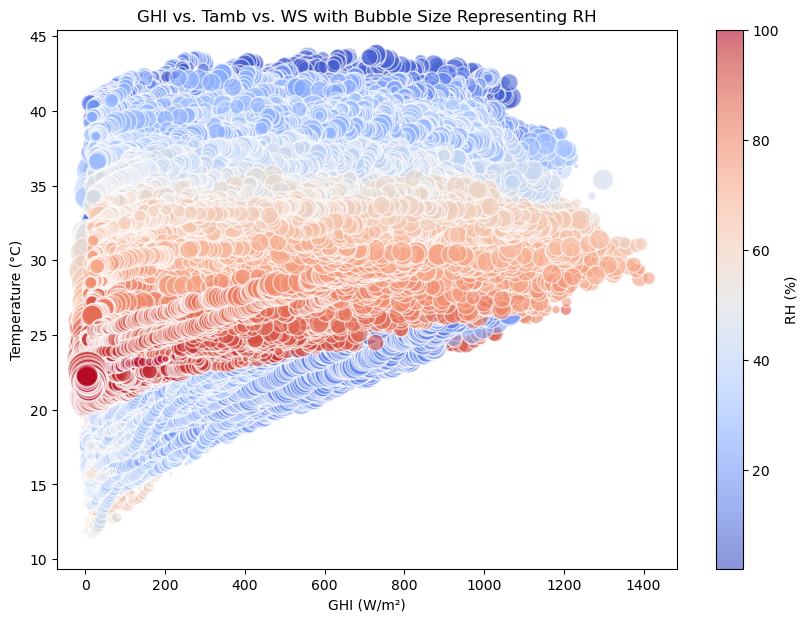

In [13]:
plt.figure(figsize=(10, 7))

bubble_size = df['WS'] * 50 
plt.scatter(df['GHI'], df['Tamb'], s=bubble_size, c=df['RH'], cmap='coolwarm', alpha=0.6, edgecolor='w')

plt.title('GHI vs. Tamb vs. WS with Bubble Size Representing RH')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Temperature (°C)')
plt.colorbar(label='RH (%)')
plt.show()

In [14]:
# Create a copy of the original DataFrame
df_clean = df.copy()

# Drop columns that are completely null
df_clean = df_clean.dropna(axis=1, how='all')
dropped_columns = set(df.columns) - set(df_clean.columns)
print("Dropped columns (completely null):", dropped_columns)

# Fill missing values with mean
df_clean = df_clean.fillna(df_clean.mean())
missing_values_after_fill = df_clean.isnull().sum()
print("Remaining missing values after filling with mean:\n", missing_values_after_fill)


# Handle negative values by replacing them with NaN
df_clean.loc[df_clean['GHI'] < 0, 'GHI'] = pd.NA
negative_ghi = df_clean['GHI'][df_clean['GHI'] < 0].count()
nan_in_ghi = df_clean['GHI'].isna().sum()
print(f"Negative GHI values after cleaning: {negative_ghi}")
print(f"NaN values in GHI after replacing negative values: {nan_in_ghi}")


Dropped columns (completely null): {'Comments'}
Remaining missing values after filling with mean:
 GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64
Negative GHI values after cleaning: 0
NaN values in GHI after replacing negative values: 0
